In [2]:
! python3.7 -m pip install lightkurve --upgrade

Defaulting to user installation because normal site-packages is not writeable
dbus[16886]: Dynamic session lookup supported but failed: launchd did not provide a socket path, verify that org.freedesktop.dbus-session.plist is loaded!
dbus[16886]: Dynamic session lookup supported but failed: launchd did not provide a socket path, verify that org.freedesktop.dbus-session.plist is loaded!
     |████████████████████████████████| 247 kB 5.3 MB/s eta 0:00:01
     |████████████████████████████████| 4.5 MB 10.8 MB/s eta 0:00:01
     |████████████████████████████████| 97 kB 4.7 MB/s eta 0:00:011
     |████████████████████████████████| 18.5 MB 10.8 MB/s eta 0:00:01
     |████████████████████████████████| 112 kB 31.3 MB/s eta 0:00:01
     |████████████████████████████████| 41 kB 455 kB/s  eta 0:00:01
     |████████████████████████████████| 233 kB 41.7 MB/s eta 0:00:01
     |████████████████████████████████| 840 kB 25.7 MB/s eta 0:00:01
     |████████████████████████████████| 7.8 MB 30.4 MB/s eta 0

  Created wheel for memoization: filename=memoization-0.4.0-py3-none-any.whl size=50467 sha256=6ff4d14241213591c9db097a565299be5f3feffe46fb3a004dfa1e4f6e3b23e2
  Stored in directory: /Users/katyaleidig/Library/Caches/pip/wheels/38/f7/65/161985e7311dd484a23b3a5c9149995dbf11db6cede602e7ef
  Created wheel for oktopus: filename=oktopus-0.1.2-py3-none-any.whl size=12779 sha256=0c76a208adbe8d50f844e9bd1f831ead1e8934e9b0f53c4db75d60da475a5453
  Stored in directory: /Users/katyaleidig/Library/Caches/pip/wheels/19/22/e3/6d224a32d6f94f28113d6d26c8bef81d7e05978d0efed29517
  Created wheel for pyvo: filename=pyvo-1.2.1-py3-none-any.whl size=831658 sha256=71eaf2762502bfa3ab74ece7326b16f51a3ae4ba668913b65977a2de5246e759
  Stored in directory: /Users/katyaleidig/Library/Caches/pip/wheels/97/03/e6/5572c24d6cae3cf544bba20a8d25c25f4f9bae6e0746cdc732
  Created wheel for autograd: filename=autograd-1.3-py3-none-any.whl size=47988 sha256=e2610671e1b94f2ecad586c686e2b14b3098f2043bfaafeced1611d7faab9f13
  Sto

In [3]:
import lightkurve as lk
from lightkurve import search_targetpixelfile

In [6]:
import matplotlib.pyplot as plt

In [65]:
import astropy.units as u

In [4]:
pixelfile = search_targetpixelfile("KIC 8462852", quarter=16).download();

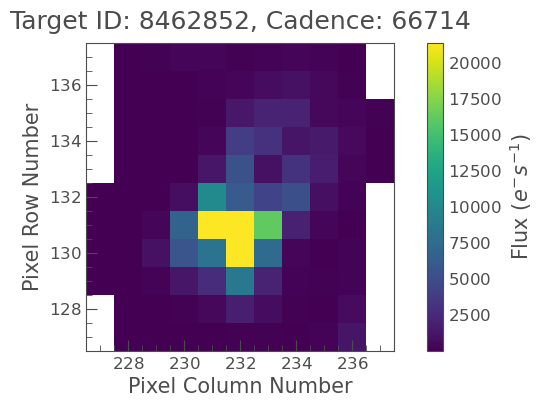

In [12]:
pixelfile.plot(frame=1);
plt.show()
plt.close()

In [13]:
lc = pixelfile.to_lightcurve(aperture_mask='all');

In [14]:
lc.time

<Time object: scale='tdb' format='bkjd' value=[1472.11777934 1472.13821223 1472.15864492 ... 1557.91762194 1557.9380561
 1557.95849016]>

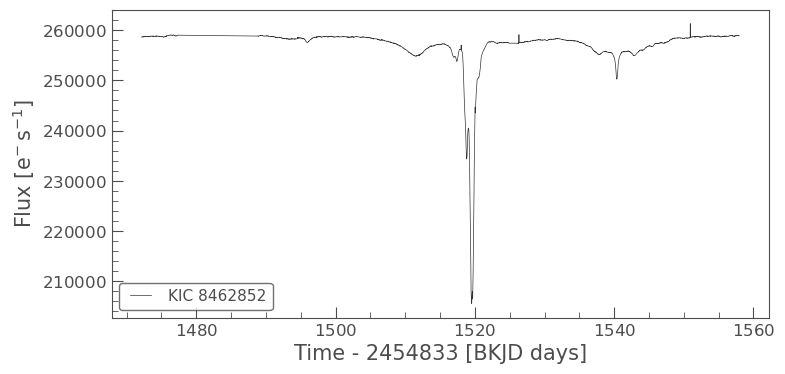

In [17]:
lc.plot();
plt.show()
plt.close()

In [32]:
search_result = lk.search_lightcurve('TIC 220523550', mission='TESS')

In [33]:
search_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 01,2018,SPOC,120,220523550,0.0
1,TESS Sector 01,2018,TESS-SPOC,1800,220523550,0.0
2,TESS Sector 01,2018,QLP,1800,220523550,0.0
3,TESS Sector 01,2018,TASOC,120,220523550,0.0
4,TESS Sector 01,2018,TASOC,1800,220523550,0.0
5,TESS Sector 02,2018,SPOC,120,220523550,0.0
6,TESS Sector 02,2018,TESS-SPOC,1800,220523550,0.0
7,TESS Sector 02,2018,QLP,1800,220523550,0.0
8,TESS Sector 02,2018,TASOC,120,220523550,0.0


In [44]:
tlc_collection = search_result.download_all()

/Users/katyaleidig/Library/Python/3.7/lib/python/site-packages/lightkurve/collections.py:266: LightkurveWarning: Some but not all of the light curves in the collection appear to be normalized. You may wish to use `normalize=True` to ensure all are normalized.
  LightkurveWarning,


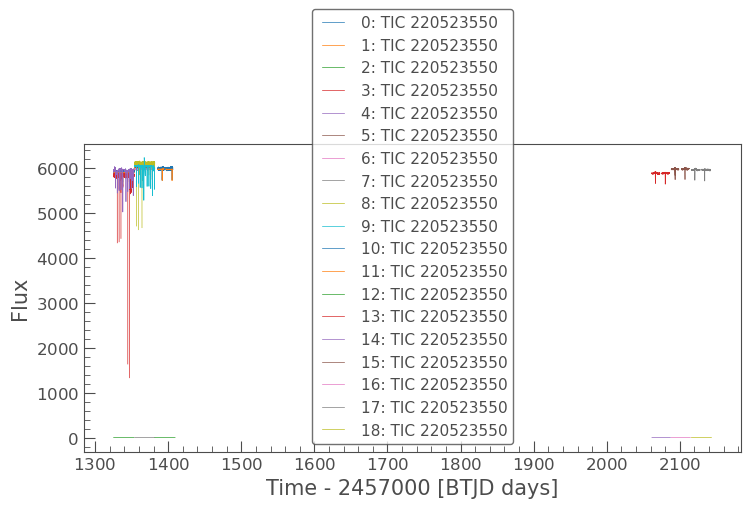

In [45]:
tlc_collection.plot();
plt.show()
plt.close()

In [46]:
tlc_stitched = tlc_collection.stitch()

/Users/katyaleidig/Library/Python/3.7/lib/python/site-packages/lightkurve/collections.py:214: LightkurveWarning: The following columns will be excluded from stitching because the column types are incompatible: {'sap_bkg', 'sap_bkg_err', 'sap_flux'}
  LightkurveWarning,


In [48]:
tlc_stitched

time,flux,flux_err,cadenceno,quality
,,,,
object,float64,float64,int32,int32
1325.2971923035257,9.9725443e-01,1.7658336e-03,70445,0
1325.2985812193313,1.0009061e+00,1.7671124e-03,70446,0
1325.2999701350204,1.0021363e+00,1.7696870e-03,70447,0
1325.3013590508258,1.0005685e+00,1.7692656e-03,70448,0
1325.3027479666314,9.9993366e-01,1.7687513e-03,70449,0
1325.3041368823206,9.9957412e-01,1.7691426e-03,70450,0
1325.305525798126,9.9993289e-01,1.7687592e-03,70451,0
1325.3069147138149,1.0024619e+00,1.7694702e-03,70452,0


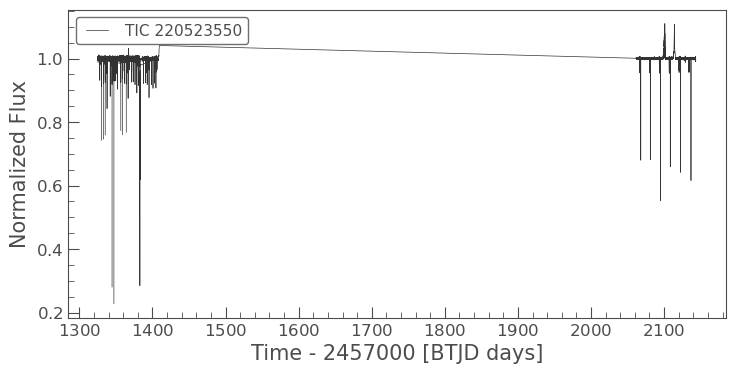

In [51]:
tlc_stitched.plot();
plt.show()
plt.close()

In [90]:
flat_lc = tlc_stitched.flatten(window_length=113)

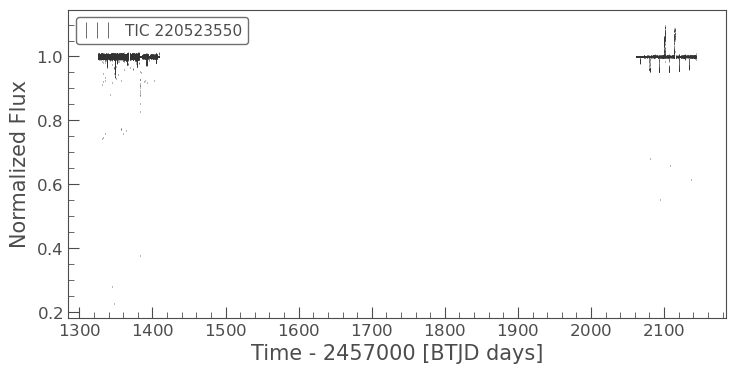

In [91]:
flat_lc.errorbar();
plt.show()
plt.close()

In [92]:
mask = (flat_lc.time.value < 1347) | (flat_lc.time.value > 1349)
masked_lc = flat_lc[mask]
masked_lc.errorbar();


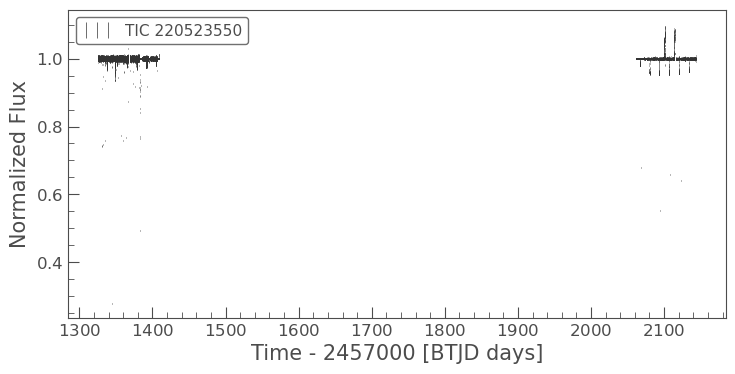

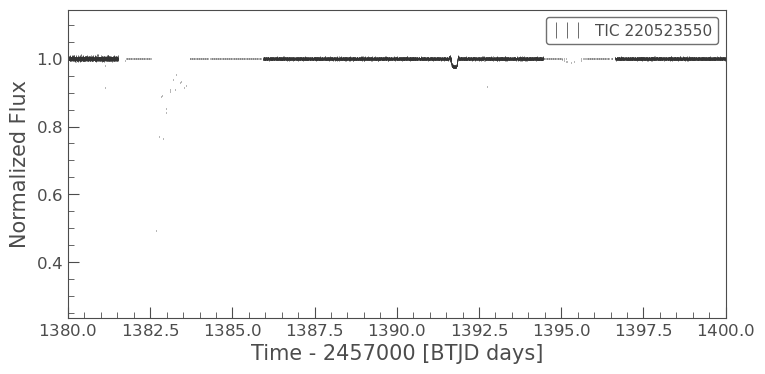

In [93]:
masked_lc.errorbar();

plt.xlim((1380,1400))
plt.show()
plt.close()

In [94]:
mask2 = (masked_lc.time.value < 1382) | (masked_lc.time.value > 1384)
masked_lc_2 = masked_lc[mask2]

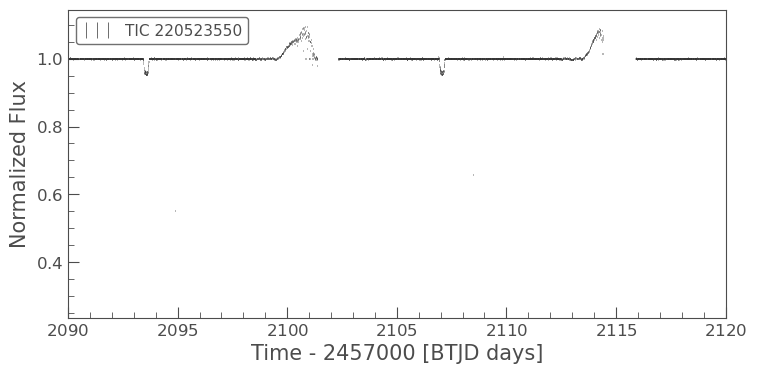

In [95]:
masked_lc_2.errorbar();

plt.xlim((2090,2120))
plt.show()
plt.close()

In [96]:
mask3 = (masked_lc_2.time.value < 2099) | (masked_lc_2.time.value > 2102)
masked_lc_3 = masked_lc_2[mask3]

In [97]:
mask4 = (masked_lc_3.time.value < 2113) | (masked_lc_3.time.value > 2116)
masked_lc_4 = masked_lc_3[mask4]

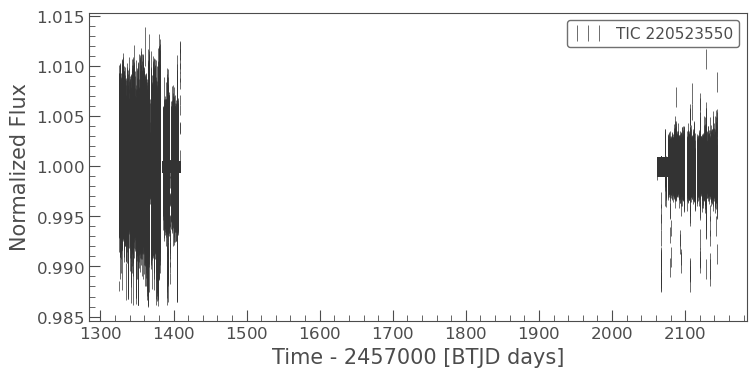

In [98]:
clipped_lc = masked_lc_4.remove_outliers(sigma=6)
clipped_lc.errorbar();
plt.show()
plt.close()

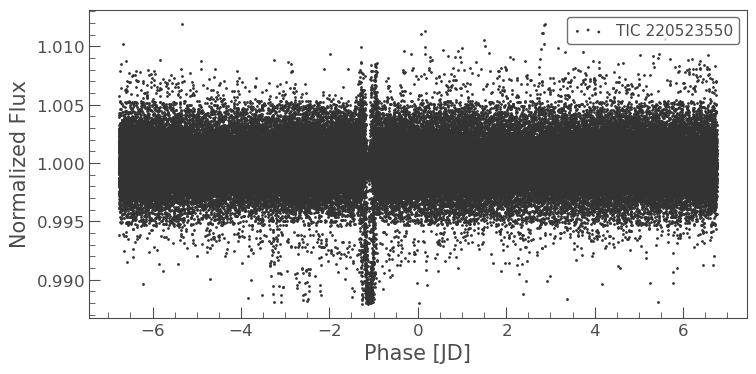

In [99]:
folded_lc = clipped_lc.fold(period=13.52361, epoch_time=clipped_lc.time[0].value)
folded_lc.scatter();
plt.show()
plt.close()

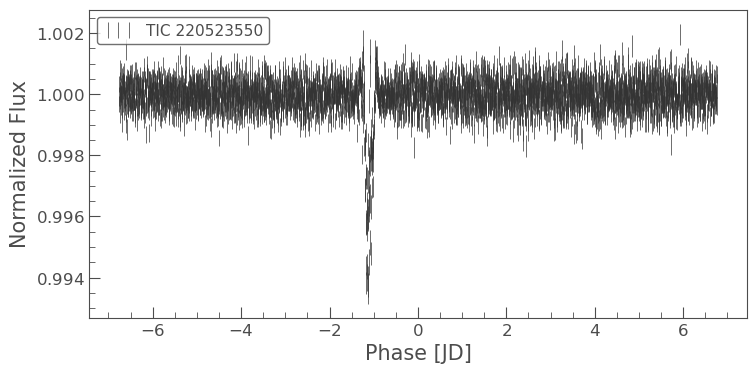

In [100]:
binned_lc = folded_lc.bin(time_bin_size=5*u.minute)
binned_lc.errorbar();
plt.show()
plt.close()

In [105]:
#pg = clipped_lc.to_periodogram(oversample_factor=1)
pg = clipped_lc.to_periodogram(minimum_period=12*u.day, maximum_period=14*u.day, oversample_factor=10)
pg.period_at_max_power

<Quantity 13.51423489 d>

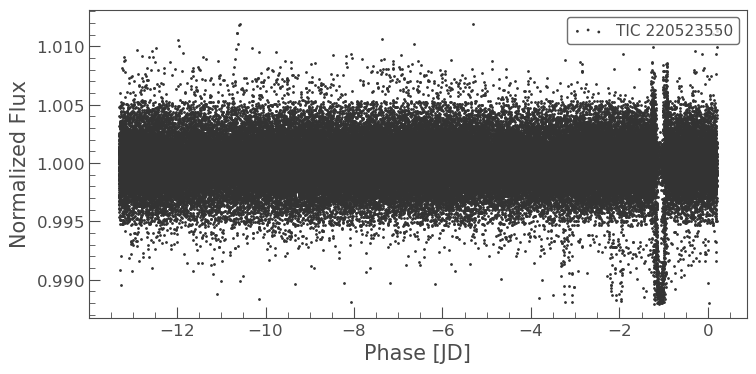

In [114]:
clipped_lc.fold(period=pg.period_at_max_power, wrap_phase=0.2).scatter();
plt.show()
plt.close()

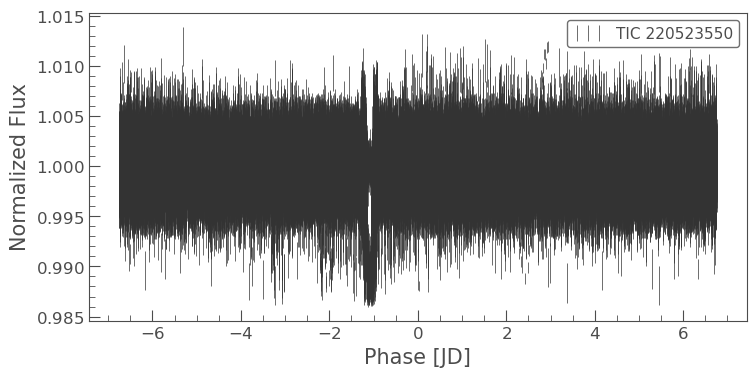

In [125]:
fold = clipped_lc.fold(period=pg.period_at_max_power, epoch_time=clipped_lc.time[0].value)
fold.errorbar();
plt.show()
plt.close()

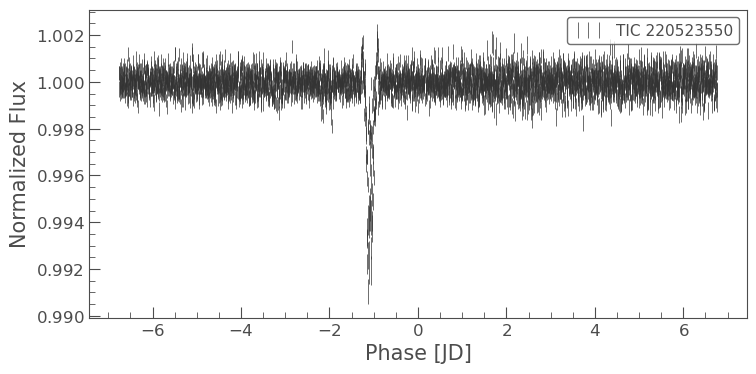

In [127]:
b = fold.bin(time_bin_size=5*u.minute)
b.errorbar();
plt.show()
plt.close()